In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d rasel180118/crops-disease-dataset

100% 1.35G/1.35G [01:20<00:00, 21.2MB/s]
100% 1.35G/1.35G [01:20<00:00, 17.9MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/crops-disease-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [20]:
train_path = '/content/Crops_disease_dataset/Train'
valid_path = '/content/Crops_disease_dataset/Val'
test_path = '/content/Crops_disease_dataset/Test'

In [21]:
# Define image dimensions and batch size
img_size = (224, 224)
batch_size = 32

In [22]:
# Create data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 11951 images belonging to 22 classes.


In [24]:
# Create data generators without augmentation for validation and test data
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1495 images belonging to 22 classes.


In [26]:
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1497 images belonging to 22 classes.


In [27]:
# Load the pre-trained ResNet-50 model from TensorFlow Hub
base_model = hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4", input_shape=(224, 224, 3))

In [28]:
# Freeze the pre-trained layers
base_model.trainable = False

In [29]:
# Create a custom model on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

In [31]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
trainData = tf.keras.preprocessing.image_dataset_from_directory(train_path)

Found 11951 files belonging to 22 classes.


In [33]:
for image_batch, labels_batch in trainData.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[20 14 20 16 20 20 19 11 18 20 17 18 10 11 19  5 13 10 20 17  9 16 20 15
 18 13 11 16 21 18 19 13]


In [34]:
for image_batch, labels_batch in trainData.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [35]:
class_names = trainData.class_names
class_names

['Bean_angular_leaf_spot',
 'Bean_bean_rust',
 'Cauliflower_Alternaria_Leaf_Spot',
 'Cauliflower_Black_Rot',
 'Cauliflower_Cabbage aphid colony',
 'Cauliflower_Downy_Mildew',
 'Cauliflower_ring spot',
 'Paddy_Bacterial leaf blight',
 'Paddy_Brown spot',
 'Paddy_Leaf smut',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

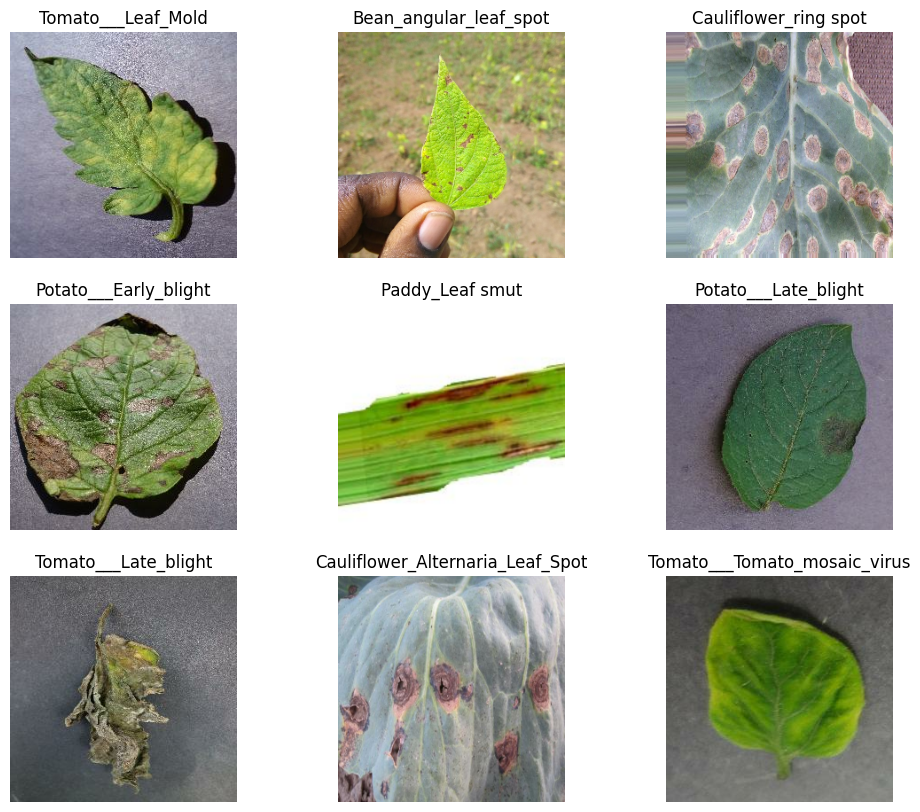

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
for image_batch, labels_batch in trainData.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [37]:
# Train the model
history = model.fit(
    train_generator,
    epochs=40,  #adjust as needed
    validation_data=valid_generator
)

Epoch 1/40
374/374 [==============================] - 206s 523ms/step - loss: 0.9402 - accuracy: 0.6948 - val_loss: 0.4756 - val_accuracy: 0.8488
Epoch 2/40
374/374 [==============================] - 190s 509ms/step - loss: 0.5385 - accuracy: 0.8180 - val_loss: 0.3070 - val_accuracy: 0.9010
Epoch 3/40
374/374 [==============================] - 193s 517ms/step - loss: 0.4451 - accuracy: 0.8512 - val_loss: 0.2902 - val_accuracy: 0.9077
Epoch 4/40
374/374 [==============================] - 193s 515ms/step - loss: 0.3934 - accuracy: 0.8610 - val_loss: 0.2238 - val_accuracy: 0.9157
Epoch 5/40
374/374 [==============================] - 192s 513ms/step - loss: 0.3737 - accuracy: 0.8683 - val_loss: 0.2319 - val_accuracy: 0.9204
Epoch 6/40
374/374 [==============================] - 196s 523ms/step - loss: 0.3354 - accuracy: 0.8864 - val_loss: 0.2372 - val_accuracy: 0.9171
Epoch 7/40
374/374 [==============================] - 193s 517ms/step - loss: 0.3138 - accuracy: 0.8943 - val_loss: 0.1831 -

In [38]:
import matplotlib.pyplot as plt

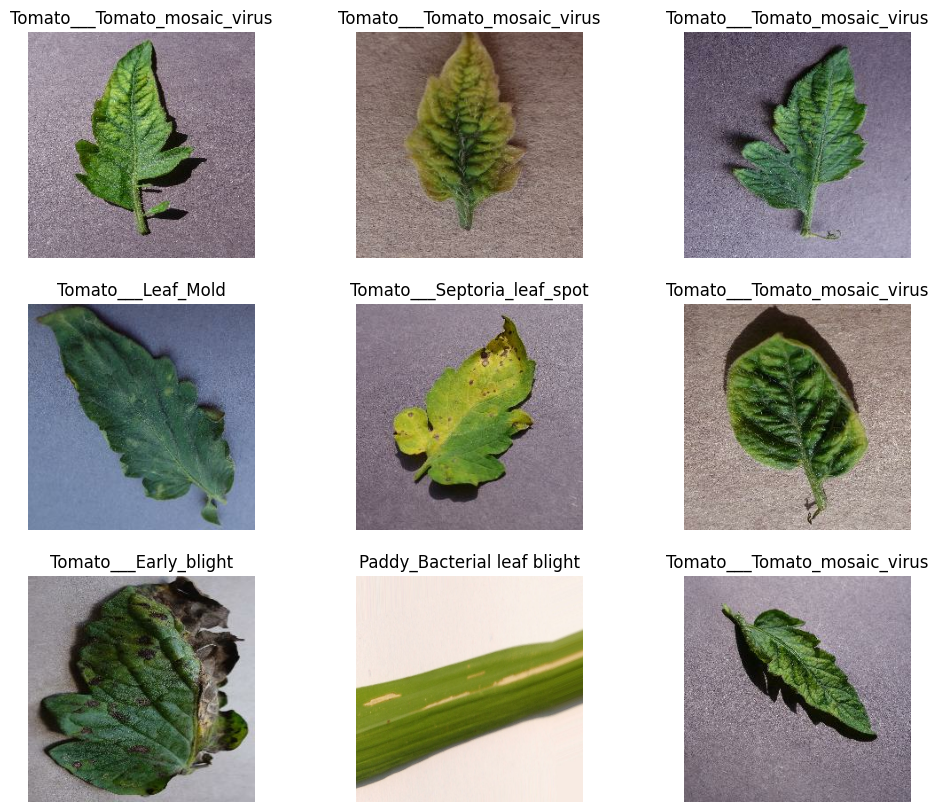

In [39]:
plt.figure(figsize = (12,10))
for image_batch, labels_batch in trainData.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [40]:
# Save the model if needed
model.save("Transfer_learning_with_ResNet50.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
trainData = tf.keras.preprocessing.image_dataset_from_directory('/content/Crops_disease_dataset/Train')

Found 11951 files belonging to 22 classes.


In [42]:
# Evaluate the model on a test dataset if available
test_generator = test_datagen.flow_from_directory(
    '/content/Crops_disease_dataset/Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1497 images belonging to 22 classes.


In [43]:
testData = tf.keras.preprocessing.image_dataset_from_directory('/content/Crops_disease_dataset/Test')

Found 1497 files belonging to 22 classes.


In [44]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

47/47 [==============================] - 10s 223ms/step - loss: 0.0614 - accuracy: 0.9760
Test Accuracy: 97.60%


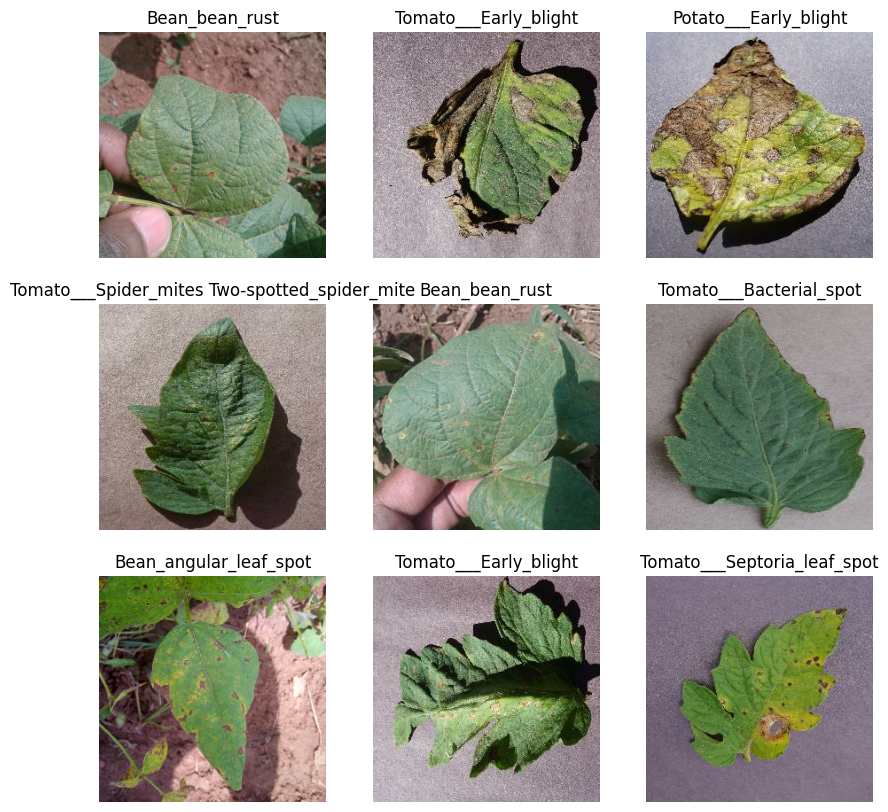

In [45]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in testData.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['accuracy']
val_loss = history.history['val_loss']

In [47]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Training and validation loss')

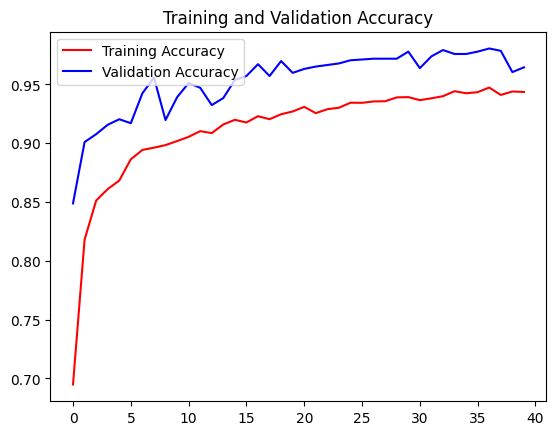

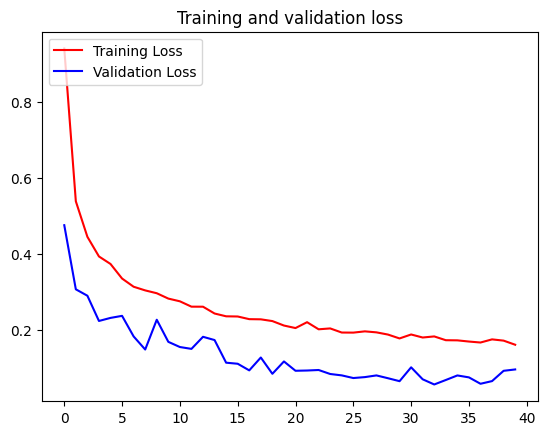

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Traning Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc = 'upper left')
plt.figure()


plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation  Loss")
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')

plt.title('Training and validation loss')

In [49]:
import numpy as np
from PIL import Image
from tensorflow import keras


In [57]:
new_image = keras.preprocessing.image.load_img('/content/bean_33.jpg', target_size=(224, 224))
new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.0  # Normalize the image

1/1 [==============================] - 0s 22ms/step


	Predicted class: Bean_angular_leaf_spot


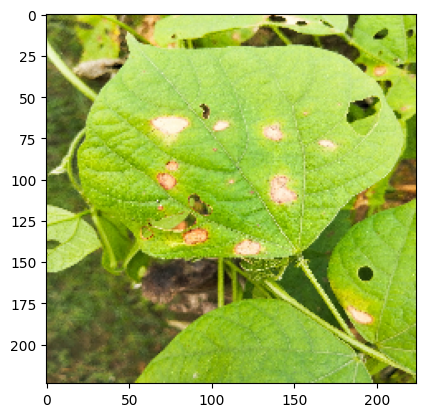

In [58]:
predictions = model.predict(np.expand_dims(new_image, axis=0))
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]
print("\n")
plt.imshow(new_image)
print(f"\tPredicted class: {predicted_class}")
#plt.axis("off")
